In [2]:
from pandas import read_csv
from matplotlib import pyplot as plt

import seaborn as sns
import numpy as np
import os


In [3]:
data_folder = "../../data/prepared_data/"

os.listdir(data_folder)

['unpd_combined_indicators.csv',
 'gbd_world_pop.csv',
 'date_for_8bn.csv',
 'gbd_scenarios_pop.csv',
 'unpd_world_indicators.csv',
 'gbd_world_births.csv']

In [4]:
dates_8bn = read_csv(data_folder + "date_for_8bn.csv")
gbd_scenarios_pop = read_csv(data_folder + "gbd_scenarios_pop.csv")
unpd_combined_indicators = read_csv(data_folder + "unpd_combined_indicators.csv")

In [5]:
dates_8bn

,scenario_name,year_id,val
0,High,2068,8.051131e+09
1,Low,2131,8.005052e+09
2,Medium,2083,8.066832e+09
3,Reference,2095,8.002094e+09
4,SDG Met Need and Education,2126,8.016662e+09


In [15]:
un_matched_dates = dates_8bn\
    .merge(unpd_combined_indicators,
           "left",
           left_on=["scenario_name","year_id"],
           right_on=["Variant","Time"])\
    .loc[:,["scenario_name","year_id","TPopulation1July"]]

In [10]:
unpd_combined_indicators.columns

Index(['Unnamed: 0', 'SortOrder', 'LocID', 'Notes', 'ISO3_code', 'ISO2_code',
       'SDMX_code', 'LocTypeID', 'LocTypeName', 'ParentID', 'Location',
       'VarID', 'Variant', 'Time', 'TPopulation1Jan', 'TPopulation1July',
       'TPopulationMale1July', 'TPopulationFemale1July', 'PopDensity',
       'PopSexRatio', 'MedianAgePop', 'NatChange', 'NatChangeRT', 'PopChange',
       'PopGrowthRate', 'DoublingTime', 'Births', 'Births1519', 'CBR', 'TFR',
       'NRR', 'MAC', 'SRB', 'Deaths', 'DeathsMale', 'DeathsFemale', 'CDR',
       'LEx', 'LExMale', 'LExFemale', 'LE15', 'LE15Male', 'LE15Female', 'LE65',
       'LE65Male', 'LE65Female', 'LE80', 'LE80Male', 'LE80Female',
       'InfantDeaths', 'IMR', 'LBsurvivingAge1', 'Under5Deaths', 'Q5', 'Q0040',
       'Q0040Male', 'Q0040Female', 'Q0060', 'Q0060Male', 'Q0060Female',
       'Q1550', 'Q1550Male', 'Q1550Female', 'Q1560', 'Q1560Male',
       'Q1560Female', 'NetMigrations', 'CNMR', 'BirthsSingle'],
      dtype='object')

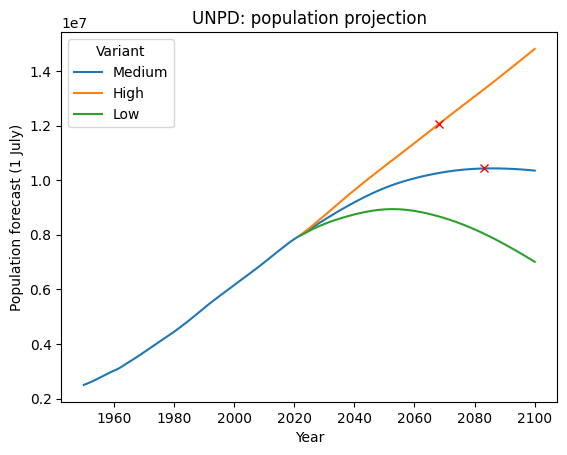

In [16]:
sns.lineplot(data=unpd_combined_indicators[unpd_combined_indicators.Location=="World"],
             x="Time",
             y="TPopulation1July",
             hue="Variant")
plt.title("UNPD: population projection")
plt.xlabel("Year")
plt.ylabel("Population forecast (1 July)")
plt.plot(un_matched_dates.year_id, un_matched_dates.TPopulation1July, "rx")
plt.show()

In [23]:
gbd_matched_dates = dates_8bn.loc[:,["scenario_name","year_id"]]\
    .merge(gbd_scenarios_pop[gbd_scenarios_pop.location_name=="Global"],
           "left",
           left_on=["scenario_name","year_id"],
           right_on=["scenario_name","year_id"])\
    .loc[:,["scenario_name","year_id","val"]]

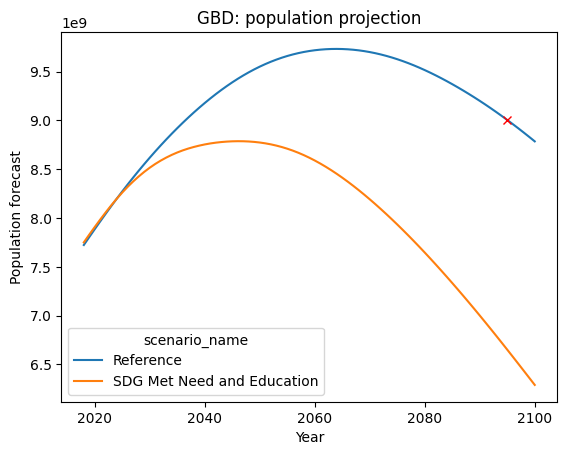

In [24]:
sns.lineplot(data=gbd_scenarios_pop[gbd_scenarios_pop.location_name=="Global"],
             x="year_id",
             y="val",
             hue="scenario_name")
plt.title("GBD: population projection")
plt.xlabel("Year")
plt.ylabel("Population forecast")
plt.plot(gbd_matched_dates.year_id, gbd_matched_dates.val, "rx")
plt.show()

In [20]:
gbd_scenarios_pop.columns

Index(['Unnamed: 0', 'location_id', 'location_name', 'sex_id', 'sex',
       'age_group_id', 'age_group_name', 'year_id', 'measure_id',
       'measure_name', 'metric_id', 'metric_name', 'scenario', 'scenario_name',
       'val', 'upper', 'lower'],
      dtype='object')

In [22]:
gbd_matched_dates

,scenario_name,year_id,val
0,High,2068,NaN
1,Low,2131,NaN
2,Medium,2083,NaN
3,Reference,2095,9.004754e+09
4,Reference,2095,3.318685e+08
...,...,...,...
223,Reference,2095,2.124755e+05
224,Reference,2095,3.296993e+07
225,Reference,2095,1.265900e+07
226,Reference,2095,1.092167e+07
